In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = '/content/drive/MyDrive/머신러닝/data/marketing_campaign.csv'

In [3]:
df = pd.read_csv(train_path, sep='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#결측치 제거
df = df.dropna()

## feature extraction

In [7]:
data = df.copy()

In [8]:
#나이 열 만들어주기
data["Age"] = 2024 - data['Year_Birth']

In [9]:
data['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2216, dtype: int64

In [10]:
#총 소비량에 대한 열 만들기
data['Spent'] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [11]:
data["Living_with"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [12]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [16]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spent', 'Living_with', 'Children'],
      dtype='object')

In [17]:
data["Family_Size"] = data["Living_with"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [19]:
#자녀의 수가 0초과이면 1, 그렇지 않으면 0
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [20]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [21]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [22]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [23]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,43,422,Partner,1,3,1


In [24]:
#너무 지나친 사람들 빼기
print("최연소자 : ", data['Age'].min())
print("최연장자 : ", data['Age'].max())
print("중앙나이 : ", data['Age'].median())

최연소자 :  28
최연장자 :  131
중앙나이 :  54.0


In [25]:
data = data[(data["Age"]<=70)]

In [26]:
print("최연소자 : ", data['Age'].min())
print("최연장자 : ", data['Age'].max())
print("중앙나이 : ", data['Age'].median())

최연소자 :  28
최연장자 :  70
중앙나이 :  52.0


In [27]:
from sklearn.preprocessing import LabelEncoder

#라벨 인코더
le =LabelEncoder()

for i in range(len(data.columns)):
  if data[data.columns[i]].dtype == 'object':
    print(data.columns[i])

Education
Living_with


In [28]:
for i in range(len(data.columns)):
  if data[data.columns[i]].dtype == 'object':
    data[data.columns[i]] = le.fit_transform(data[data.columns[i]])

In [29]:
data['Living_with']

0       0
1       0
2       1
3       1
4       1
       ..
2234    1
2235    1
2237    0
2238    1
2239    1
Name: Living_with, Length: 1949, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler

#스케일러
scaler = StandardScaler()
data = scaler.fit_transform(data)

##모델링

In [31]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN()

In [32]:
dbsc.fit(data)

DBSCAN()

In [33]:
db_prediction = dbsc.labels_
print(db_prediction)

[-1 -1 -1 ... -1 -1 -1]


<ipython-input-34-e97802306dbf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=db_prediction, palette= pal)
<ipython-input-34-e97802306dbf>:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  pl = sns.countplot(x=db_prediction, palette= pal)


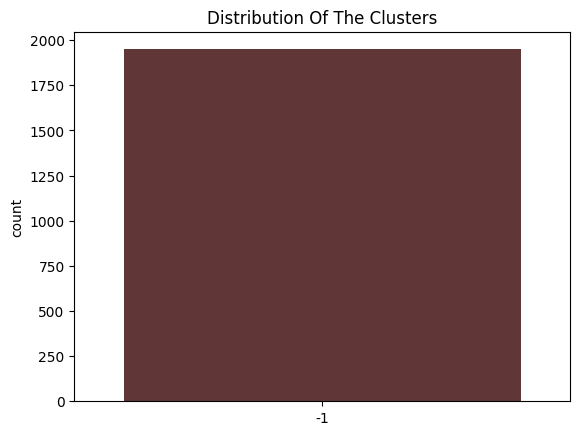

In [34]:
import seaborn as sns

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=db_prediction, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()